In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/14774/875431/compressed/train_images.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1699849168&Signature=mOoHLIHoheWVAtvMX0CcuNii9o9RBxy5y7HNi0DJc4Wsc%2BxVHyp2AfZ6rAlYGRXefhN3sFtrWwysA49WHmuHaxAwWjiVim0P3AxuEI8DTSAEW%2Bw9LyeeyQdLT6%2BDK1t7YgYEoN4MzQULQTI2%2FuQPOK7oYXz6vzMAmSHWOaz47xz9WFUpTGsEneDlv9DkkyWakFx5xBTWV6EYYyuZRxXzBpooLIxh2UkByjoMdJR1RI25PJ4eMD1PkIF724BwrVerFT9FrbcttEh3STiZuiVGwddjdGxqR7iz22oQet2E3pRIFAVGXcYf8leF05Aviw1WSR6RhmEhItDaZlCagHxX8w%3D%3D&response-content-disposition=attachment%3B+filename%3Dtrain_images.zip" -c -O 'train_images.zip'

--2023-11-10 04:20:21--  https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/14774/875431/compressed/train_images.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1699849168&Signature=mOoHLIHoheWVAtvMX0CcuNii9o9RBxy5y7HNi0DJc4Wsc%2BxVHyp2AfZ6rAlYGRXefhN3sFtrWwysA49WHmuHaxAwWjiVim0P3AxuEI8DTSAEW%2Bw9LyeeyQdLT6%2BDK1t7YgYEoN4MzQULQTI2%2FuQPOK7oYXz6vzMAmSHWOaz47xz9WFUpTGsEneDlv9DkkyWakFx5xBTWV6EYYyuZRxXzBpooLIxh2UkByjoMdJR1RI25PJ4eMD1PkIF724BwrVerFT9FrbcttEh3STiZuiVGwddjdGxqR7iz22oQet2E3pRIFAVGXcYf8leF05Aviw1WSR6RhmEhItDaZlCagHxX8w%3D%3D&response-content-disposition=attachment%3B+filename%3Dtrain_images.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.146.207, 108.177.112.207, 172.217.212.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.146.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8602291542 (8.0G) [application/zip]
Saving to: ‘train_images.zip’

train_images.zip

In [ ]:
!mkdir images

In [ ]:
!unzip /content/train_images.zip -d /content/images

Archive:  /content/train_images.zip
  inflating: /content/images/000c1434d8d7.png  
  inflating: /content/images/001639a390f0.png  
  inflating: /content/images/0024cdab0c1e.png  
  inflating: /content/images/002c21358ce6.png  
  inflating: /content/images/005b95c28852.png  
  inflating: /content/images/0083ee8054ee.png  
  inflating: /content/images/0097f532ac9f.png  
  inflating: /content/images/00a8624548a9.png  
  inflating: /content/images/00b74780d31d.png  
  inflating: /content/images/00cb6555d108.png  
  inflating: /content/images/00cc2b75cddd.png  
  inflating: /content/images/00e4ddff966a.png  
  inflating: /content/images/00f6c1be5a33.png  
  inflating: /content/images/0104b032c141.png  
  inflating: /content/images/0124dffecf29.png  
  inflating: /content/images/0125fbd2e791.png  
  inflating: /content/images/012a242ac6ff.png  
  inflating: /content/images/014508ccb9cb.png  
  inflating: /content/images/0151781fe50b.png  
  inflating: /content/images/0161338f53cc.png  
  in

### model-1

In [ ]:
from keras.models import Sequential
from keras import layers
from keras.models import Model
from keras.layers import Input, Conv2D, Dense, Flatten, MaxPooling2D,Dropout,BatchNormalization,GlobalAveragePooling2D
import tensorflow as tf
from keras import backend as K

In [ ]:
tf.keras.backend.clear_session()
InceptionResNetV2= tf.keras.applications.InceptionResNetV2(input_shape=(75, 75,3),include_top=False)
for layer in InceptionResNetV2.layers[:-10]:
  layer.trainable = False

flatten = Flatten()(InceptionResNetV2.output)

drop =  Dropout(0.5)(flatten)
dense1 = Dense(512, activation='relu',kernel_initializer=tf.keras.initializers.HeNormal(seed=32),kernel_regularizer='l2')(drop)
BN1=tf.keras.layers.BatchNormalization()(dense1)
dense2 = Dense(128, activation='relu',kernel_initializer=tf.keras.initializers.HeNormal(seed=32),kernel_regularizer='l2')(BN1)
BN2=tf.keras.layers.BatchNormalization()(dense2)
dense3 = Dense(64, activation='relu',kernel_initializer=tf.keras.initializers.HeNormal(seed=32),kernel_regularizer='l2')(BN2)
BN3=tf.keras.layers.BatchNormalization()(dense3)
Output_layer = Dense(units=2,activation='softmax',kernel_initializer=tf.keras.initializers.glorot_uniform(),name='Output')(BN3)

model4 = Model(inputs=InceptionResNetV2.input,outputs=Output_layer)
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999,decay = 1e-2/15)
model4.compile(optimizer=optimizer, loss="categorical_crossentropy",metrics=["accuracy","AUC"],run_eagerly=True)

219055592/219055592 [==============================] - 1s 0us/step


In [ ]:
model4.load_weights('/content/drive/MyDrive/NoteBook-20231030T144820Z-001/NoteBook/final1.h5')

### model2

In [ ]:
tf.keras.backend.clear_session()
DenseNet121_model = tf.keras.applications.DenseNet121(include_top=False,weights=None,input_tensor=Input(shape=(256,256,3)))
DenseNet121_model.load_weights('/content/drive/MyDrive/NoteBook-20231030T144820Z-001/NoteBook/DenseNet-BC-121-32-no-top.h5')
p  = GlobalAveragePooling2D()(DenseNet121_model.output)
d11 = Dense(units = 256, activation = 'relu',kernel_regularizer= tf.keras.regularizers.l2(0.0001))(p)
o1 = Dense(units = 4, activation = 'softmax')(d11)
model1 = Model(inputs = DenseNet121_model.input,outputs = o1)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
model1.compile(optimizer=optimizer, loss="categorical_crossentropy",metrics=["accuracy"],run_eagerly=True)

In [ ]:
model1.load_weights('/content/drive/MyDrive/NoteBook-20231030T144820Z-001/NoteBook/final2.h5')

##Data-loading

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/NoteBook-20231030T144820Z-001/NoteBook/train1.csv')
df.head()

,id_code,diagnosis
0,000c1434d8d7.png,2
1,001639a390f0.png,4
2,0024cdab0c1e.png,1
3,002c21358ce6.png,0
4,005b95c28852.png,0


In [ ]:
import numpy as np
conditions = [
    (df['diagnosis'] == 0),
    (df['diagnosis'] == 1),
    (df['diagnosis'] == 2),
    (df['diagnosis'] == 3),
    (df['diagnosis'] == 4)]
choices = ['No DR', 'Mild', 'Moderate','Severe','Proliferative DR']
df['class'] = np.select(conditions, choices)
df.head()

,id_code,diagnosis,class
0,000c1434d8d7.png,2,Moderate
1,001639a390f0.png,4,Proliferative DR
2,0024cdab0c1e.png,1,Mild
3,002c21358ce6.png,0,No DR
4,005b95c28852.png,0,No DR


In [ ]:
df["id_code"] = df["id_code"]

In [ ]:
test = df[['id_code','class']]

In [ ]:
!pip install Keras-Preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.6 MB/s eta 0:00:00


In [ ]:
from keras_preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_dataframe(test, "/content/images/", x_col='id_code',y_col=None,
target_size=(75,75),class_mode=None,batch_size=64,shuffle=False)

Found 3662 validated image filenames.


In [ ]:
## Take more than 6 mins
y_predict = model4.predict(train_generator)
y_predict = np.argmax(y_predict, axis=1)

58/58 [==============================] - 431s 7s/step


In [ ]:
df["model1_prediction"] = y_predict ^ 1
df.head()

,id_code,diagnosis,class,model1_prediction
0,000c1434d8d7.png,2,Moderate,1
1,001639a390f0.png,4,Proliferative DR,1
2,0024cdab0c1e.png,1,Mild,1
3,002c21358ce6.png,0,No DR,0
4,005b95c28852.png,0,No DR,0


In [ ]:
import cv2
import numpy as np
from concurrent.futures import ThreadPoolExecutor
from tqdm import tqdm

def load_raw_images_df(data_frame,filenamecol,labelcol,img_size,n_classes):
    n_images = len(data_frame)
    X = np.empty((n_images,img_size,img_size,3))
    Y = np.zeros((n_images,n_classes))
    for index,entry in data_frame.iterrows():
        Y[index,entry[labelcol]-1] = 1
        img = cv2.imread( "/content/images/" + entry[filenamecol])
        X[index,:] = cv2.resize(img, (img_size, img_size))
        X[index,:] = X[index,:] / 255.0
    return X,Y

In [ ]:
df2 = df[df['model1_prediction'] != 0]
df2 = df2.reset_index(drop=True)
df2.head()

,id_code,diagnosis,class,model1_prediction
0,000c1434d8d7.png,2,Moderate,1
1,001639a390f0.png,4,Proliferative DR,1
2,0024cdab0c1e.png,1,Mild,1
3,0083ee8054ee.png,4,Proliferative DR,1
4,00a8624548a9.png,2,Moderate,1


In [ ]:
## Take more than 4 mins
X_val,Y_val = load_raw_images_df(df2,"id_code","diagnosis",256,4)

In [ ]:
## Take more than 6 mins
y_predict_model2 = model1.predict(X_val)

57/57 [==============================] - 14s 238ms/step


In [ ]:
y_predict_model2 = np.argmax(y_predict_model2, axis=1)+1

In [ ]:
list1 = df["id_code"].to_list()
list2 = df2["id_code"].to_list()

In [ ]:
model2_prediction = []
for i in list1:
  if i in list2:
    index = list2.index(i)
    model2_prediction.append(y_predict_model2[index])
  else:
    model2_prediction.append(0)

In [ ]:
df["model2_prediction"] = model2_prediction
df.head()

,id_code,diagnosis,class,model1_prediction,model2_prediction
0,000c1434d8d7.png,2,Moderate,1,2
1,001639a390f0.png,4,Proliferative DR,1,4
2,0024cdab0c1e.png,1,Mild,1,1
3,002c21358ce6.png,0,No DR,0,0
4,005b95c28852.png,0,No DR,0,0


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix


y_true = df["diagnosis"].to_list()
y_pred = df["model2_prediction"].to_list()


accuracy = accuracy_score(y_true, y_pred)


f1 = f1_score(y_true, y_pred, average='weighted')


conf_matrix = confusion_matrix(y_true, y_pred, labels=[0, 1, 2, 3, 4])

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")

Accuracy: 0.8309666848716548
F1 Score: 0.8276637710716517


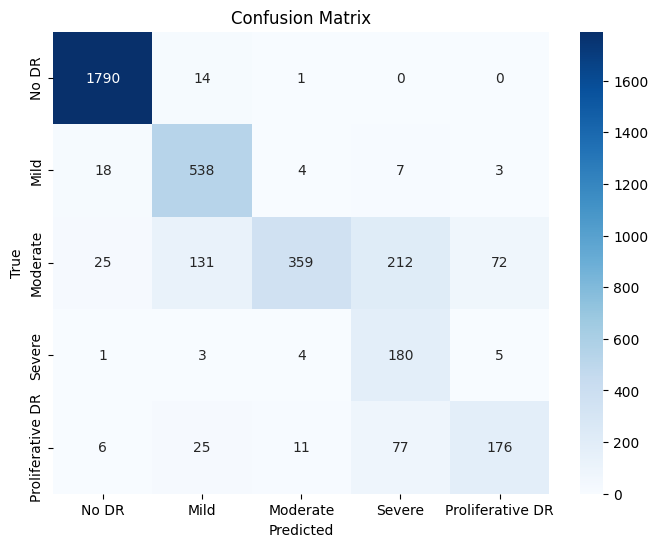

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

class_labels = ['No DR', 'Mild', 'Moderate', 'Severe', 'Proliferative DR']

plt.figure(figsize=(8, 6))


sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)


plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

plt.show()


In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_true, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1805
           1       0.76      0.94      0.84       570
           2       0.95      0.45      0.61       799
           3       0.38      0.93      0.54       193
           4       0.69      0.60      0.64       295

    accuracy                           0.83      3662
   macro avg       0.75      0.78      0.72      3662
weighted avg       0.88      0.83      0.83      3662

